In [31]:
#import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.rcParams['figure.figsize'] = [9,9]

In [32]:
#number of features for 4-D real values vectors
features = 4
#number of samples to be generated for the vector
samples = 10000

In [33]:
#initialize the means for different classes
mean = np.zeros((features,features)) #4x4 zero vector
mean[:,0] = [-1,-1,-1,-1] #mean vector of class 0
mean[:,1] = [ 1, 1, 1, 1] #mean vector of class 1

In [34]:
#initialize the covariance matrices
cov = np.zeros((features, features,features))
cov[:,:,0] = [[2,-0.5,0.3,0],[-0.5,1,-0.5,0],[0.3,-0.5,1,0],[0,0,0,2]] #covariance matrix of class 0
cov[:,:,1] = [[1,0.3,-0.2,0],[0.3,2,0.3,0  ],[-0.2,0.3,1,0],[0,0,0,3]] #covariance matrix of class 0

In [35]:
#initialize priors of class 0 and class 1 respectively
prior = [0.7, 0.3]

In [36]:
#generate 10,000 samples of 4D data
label = np.zeros((2, samples)) #2x10000 zero matrix for label values
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int) #draws 10,000 samples from a uniform distribution with low of 0 and high of 1 and compares if true/false >= prior of class 0
X = np.zeros((features,samples)) #4x10000 zero matrix for X values
for index in range(samples): #compare index number in sample number
    if(label[0,index] == 0): #if the the class prior is not higher than prior 0
        X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1) #assign random number from normal distrubution of class 0 mean and cov
    else:
        X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1) #assign random number from normal distrubution of class 1 mean and cov  

In [37]:
#calculate the Sb matrix
Sb = np.dot((mean[:,0] - mean[:,1]), (mean[:,0] - mean[:,1]).T)

#calculate the Sw matrix
Sw = (cov[:,:,0] + cov[:,:,1])

In [39]:
# Calculation of W_lda
#returns in a: the eigenvalues and b:normalized unit length eigenvectors
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]
w = eig_vecs[:,:1] 

#a,b =np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
#np.dot(np.linalg.inv(Sw),Sb)
#w = np.array(b[np.argmax(a)])

In [41]:
x0 = [i for i in range(label.shape[1]) if (label[0,i] == 0)] #assign to class 0
x1 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )] #assign to class 1

In [52]:
# Calculation of Projection vector
y0 = np.zeros((1,len(x0))) #2x number of class 0
y1 = np.zeros((1,len(x1))) #2x number of class 1
y0[0,:] = np.dot(w.T, X[:,x0]) 
y1[0,:] = np.dot(w.T, X[:,x1])
y = np.sort(np.hstack((y0[0],y1[0])))

In [43]:
# Calculate Threshold values
threshold = []
for i in range(len(y)-1):
    threshold.append((y[i] + y[i+1])/2.0)

In [28]:
# Calculate decisions for varying thresholds
fpr = []
tpr = []
minPerror = []
for t in threshold:
    x00 = list((y0[0,:] >= t).astype(int)).count(0)
    x01 = list((y1[0,:] >= t).astype(int)).count(0)
    x10 = list((y0[0,:] >= t).astype(int)).count(1)
    x11 = list((y1[0,:] >= t).astype(int)).count(1)
    fpr.append(float(x10)/y0.shape[1])
    tpr.append(float(x11)/y1.shape[1])
    minPerror.append(1 - ((x00)+(x11))/10000.0)

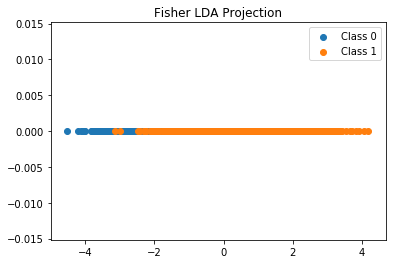

In [13]:
# Plot the Projection vector
plt.scatter(y0[0,:],np.zeros((y0.shape[1])))
plt.scatter(y1[0,:],np.zeros((y1.shape[1])))
plt.legend(['Class 0','Class 1'])
plt.title('Fisher LDA Projection')
plt.show()

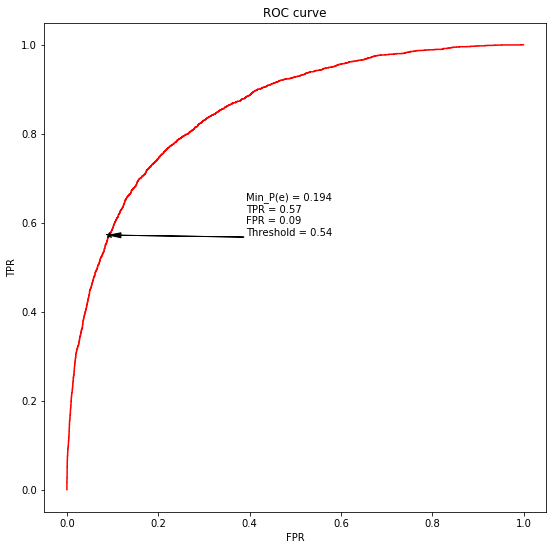

In [44]:
# Plot the ROC curve
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = 'black')
plt.title("ROC curve")
plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
+'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n'
+'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n'
+'Threshold = '+ str(round(threshold[np.argmin(minPerror)],2)),
xy=(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
xytext=(fpr[np.argmin(minPerror)]+0.3,tpr[np.argmin(minPerror)]),
arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shrink=0))
plt.show()